## Loading Libraries

In [10]:
import pyreadr
import pandas as pd
import numpy as np
import csv
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
%matplotlib widget

## Reading in Data

In [11]:
# Reading in Data
dataset = pyreadr.read_r("../data/raw_data/brain.rda")

In [12]:
arraymeta_data = dataset['arraymeta']
arraymeta_data

,patient,region.ancg,region.cb,region.dlpfc,lab.davis,lab.irvine,lab.michigan,age,sex,arrayversion
0,1834,1.0,0.0,0.0,0.0,1.0,0.0,40,M,1.0
1,1834,0.0,1.0,0.0,0.0,1.0,0.0,40,M,1.0
2,1834,0.0,1.0,0.0,0.0,0.0,1.0,40,M,1.0
3,1834,0.0,0.0,1.0,1.0,0.0,0.0,40,M,1.0
4,1834,0.0,0.0,1.0,1.0,0.0,0.0,40,M,2.0
...,...,...,...,...,...,...,...,...,...,...
381,4236,1.0,0.0,0.0,0.0,0.0,1.0,63,M,2.0
382,4236,0.0,0.0,1.0,0.0,0.0,1.0,63,M,2.0
383,4250,1.0,0.0,0.0,0.0,1.0,0.0,64,M,2.0
384,4250,1.0,0.0,0.0,0.0,0.0,1.0,64,M,2.0


In [13]:
expression_data = dataset['expression']
expression_data

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,8.597381,6.643790,6.742402,7.738635,6.477350,7.388334,6.734768,6.501485,6.312102,6.274967,...,9.472115,9.263460,11.529741,11.308839,6.427495,6.212201,6.076345,5.942940,6.050228,6.059569
1,7.507421,6.185789,6.377131,7.152656,6.002777,6.515969,6.430514,6.105450,5.947936,5.947524,...,8.665336,8.851499,10.900256,10.830566,6.077286,5.853261,5.732241,5.797226,5.788631,5.895052
2,9.151820,7.508944,7.924755,9.778946,6.991540,8.059766,8.198715,7.433385,7.047425,7.169980,...,10.752882,10.684959,12.805644,12.553357,7.242163,7.107621,6.923200,6.563461,7.024079,6.988473
3,9.480747,7.229395,7.330518,8.724294,6.897049,7.979412,7.213397,6.946586,6.530472,6.680387,...,10.663113,10.624339,12.602046,12.341308,6.871340,6.487593,6.330889,6.280178,6.379439,6.352816
4,10.855653,8.573288,8.519262,10.045489,8.053849,9.042049,8.379321,8.116254,7.623230,7.997303,...,12.470662,12.141829,13.912422,13.951137,8.206344,7.527397,7.288326,7.253048,7.331282,7.378420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,9.788715,7.990065,8.268939,9.392253,7.588384,8.461776,8.447588,7.858540,7.501698,7.341803,...,11.294439,11.084897,12.965648,12.695011,7.613313,7.400333,7.204682,7.031017,7.217905,7.296093
382,10.110330,8.193528,8.114450,9.403774,7.626703,8.505860,8.342483,7.791306,7.584267,7.535682,...,12.279642,11.974415,13.636568,13.370042,7.619108,7.408349,7.225574,7.062833,7.282214,7.320709
383,10.462571,8.496206,8.226372,9.683997,7.647338,8.811804,9.005109,8.074287,7.504952,7.727255,...,13.065861,13.082426,14.232736,14.156478,7.670240,7.343954,7.177481,7.067948,7.178223,7.354904
384,9.900810,8.147884,8.341852,9.359909,7.824822,8.437894,8.424120,7.839172,7.531454,7.402192,...,10.981730,10.977953,12.810572,12.593202,7.670840,7.558949,7.316052,7.138055,7.422764,7.448250


In [14]:
genemeta_data = dataset['genemeta']
genemeta_data

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Hs18SrRNA-3_s_at,AFFX-r2-Hs18SrRNA-5_at,AFFX-r2-Hs18SrRNA-M_x_at,AFFX-r2-Hs28SrRNA-3_at,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at
chrom,6,7,1,2,6,3,17,14,17,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sym,DDR1,RFC2,HSPA6,PAX8,GUCA1A,UBA7,THRA,PTPN21,CCL5,CYP2E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Initial EDA

### Counts from each brain region

In [15]:
# Determining the number of brain regions in each sample (apparently always 1)
arraymeta_data[['region.ancg', 'region.cb', 'region.dlpfc']].sum(axis=1).unique()

array([1.])

In [16]:
# Total number of samples from each brain region
arraymeta_data[['region.ancg', 'region.cb', 'region.dlpfc']].sum(axis = 0)

region.ancg     127.0
region.cb        81.0
region.dlpfc    178.0
dtype: float64

In [ ]:
### Cross tab by brain region and lab
# Create factors for brain region and lab
arraymeta_data['region'] = arraymeta_data[['region.ancg', 'region.cb', 'region.dlpfc']].idxmax(axis=1).str.replace('region.', '')
arraymeta_data['lab'] = arraymeta_data[['lab.davis', 'lab.irvine', 'lab.michigan']].idxmax(axis=1).str.replace('lab.', '')

# Cross tab
cross_tab_region_lab = pd.crosstab(arraymeta_data['region'], arraymeta_data['lab'])

# Print results
print(cross_tab_region_lab)

lab     davis  irvine  michigan
region                         
ancg        0      66        61
cb         21      42        18
dlpfc      85       9        84


In [ ]:
### Cross tab on Lab, Array Version, and Brain Region
crosstab_full = pd.crosstab(index=arraymeta_data['region'], columns=[arraymeta_data['lab'], arraymeta_data['arrayversion']])
print(crosstab_full)

lab          davis     irvine     michigan    
arrayversion   1.0 2.0    1.0 2.0      1.0 2.0
region                                        
ancg             0   0     36  30       31  30
cb              11  10     33   9        9   9
dlpfc           56  29      9   0       55  29


### Counts by age

In [107]:
### Cross tab by brain region and age
# Cross tab
cross_tab_br_age = pd.crosstab(arraymeta_data['age'], arraymeta_data['region'])

In [108]:
### Cross tab by brain region and age ranges of interest
# Split pandas dataframe by age group
def categorize_age(age):
    if age < 70:
        return '<70'
    else:
        return '>=70'

arraymeta_data['age_group'] = arraymeta_data['age'].apply(categorize_age)

# Cross tab
cross_tab_region_agegrp = pd.crosstab(arraymeta_data['region'], arraymeta_data['age_group'])

# Print results
print(cross_tab_region_agegrp)

age_group  <70  >=70
region              
ancg       104    23
cb          70    11
dlpfc      146    32


Important to note that we have much more data for the less than 70 group than for the more than 70 group. Moving on to analysis of expression rates.

### Investigating Missingness

In [109]:
any_NaN = expression_data.isna().any().any()
any_NaN

np.False_

Evidently, there is no missing expression data.

In [110]:
inf_mask = np.isinf(expression_data.to_numpy())
has_inf = inf_mask.any()
has_inf

np.False_

Evidently, there were no spots for which there was zero count. 

In [111]:
# Checking to see if there are duplicates in arraymeta_data
duplicates = arraymeta_data.duplicated()
sum(duplicates)

11

Evidently, there are 11 duplicates. We print these duplicates below:

In [112]:
arraymeta_data[arraymeta_data.duplicated()]

,patient,region.ancg,region.cb,region.dlpfc,lab.davis,lab.irvine,lab.michigan,age,sex,arrayversion,region,lab,age_group
5,1834,0.0,0.0,1.0,1.0,0.0,0.0,40,M,2.0,dlpfc,davis,<70
27,2169,0.0,0.0,1.0,0.0,0.0,1.0,18,M,1.0,dlpfc,michigan,<70
41,2292,0.0,0.0,1.0,0.0,0.0,1.0,55,M,1.0,dlpfc,michigan,<70
47,2316,0.0,0.0,1.0,0.0,0.0,1.0,58,M,1.0,dlpfc,michigan,<70
53,2619,0.0,0.0,1.0,1.0,0.0,0.0,48,M,2.0,dlpfc,davis,<70
63,2664,0.0,0.0,1.0,1.0,0.0,0.0,43,M,2.0,dlpfc,davis,<70
82,2847,0.0,0.0,1.0,0.0,0.0,1.0,50,M,1.0,dlpfc,michigan,<70
88,2861,0.0,0.0,1.0,0.0,0.0,1.0,60,F,1.0,dlpfc,michigan,<70
94,2894,0.0,0.0,1.0,0.0,0.0,1.0,54,M,1.0,dlpfc,michigan,<70
100,2895,0.0,0.0,1.0,1.0,0.0,0.0,48,M,2.0,dlpfc,davis,<70


In [113]:
arraymeta_data[arraymeta_data["patient"] == '1834']

,patient,region.ancg,region.cb,region.dlpfc,lab.davis,lab.irvine,lab.michigan,age,sex,arrayversion,region,lab,age_group
0,1834,1.0,0.0,0.0,0.0,1.0,0.0,40,M,1.0,ancg,irvine,<70
1,1834,0.0,1.0,0.0,0.0,1.0,0.0,40,M,1.0,cb,irvine,<70
2,1834,0.0,1.0,0.0,0.0,0.0,1.0,40,M,1.0,cb,michigan,<70
3,1834,0.0,0.0,1.0,1.0,0.0,0.0,40,M,1.0,dlpfc,davis,<70
4,1834,0.0,0.0,1.0,1.0,0.0,0.0,40,M,2.0,dlpfc,davis,<70
5,1834,0.0,0.0,1.0,1.0,0.0,0.0,40,M,2.0,dlpfc,davis,<70
6,1834,0.0,0.0,1.0,0.0,1.0,0.0,40,M,1.0,dlpfc,irvine,<70
7,1834,0.0,0.0,1.0,0.0,0.0,1.0,40,M,1.0,dlpfc,michigan,<70


In [114]:
covariate_data = arraymeta_data[["age", "sex", "arrayversion", "region", "lab", "age_group"]]

In [115]:
covariate_data

,age,sex,arrayversion,region,lab,age_group
0,40,M,1.0,ancg,irvine,<70
1,40,M,1.0,cb,irvine,<70
2,40,M,1.0,cb,michigan,<70
3,40,M,1.0,dlpfc,davis,<70
4,40,M,2.0,dlpfc,davis,<70
...,...,...,...,...,...,...
381,63,M,2.0,ancg,michigan,<70
382,63,M,2.0,dlpfc,michigan,<70
383,64,M,2.0,ancg,irvine,<70
384,64,M,2.0,ancg,michigan,<70


In [116]:
transposed_expression = expression_data.T

In [117]:
transposed_expression.to_csv('../data/processed_data/expression.csv')

In [118]:
covariate_data.to_csv('../data/processed_data/covariates.csv')

## Exploring Expression Rates

In [119]:
# Expression data, no controls
expression_data_NC = expression_data.loc[:, ~expression_data.columns.str.startswith('AFFX-')]

### PCA

In [120]:
# Separating out target (for this case, region and lab)
brain_region_lab_target = arraymeta_data[['region', 'lab']]

In [121]:
# Standardize the features
X_expression_NC = StandardScaler().fit_transform(expression_data_NC)

In [122]:
# Setting number of principal components
pca = PCA(n_components = 50)

In [123]:
# Extracting principal components
principalComponents = pca.fit_transform(X_expression_NC)

In [124]:
# Proportion of variance explained
sum((pca.explained_variance_ / sum(pca.explained_variance_))[0:2])

np.float64(0.9217974348540379)

In [125]:
PC_df = pd.DataFrame(data = principalComponents)
final_PC_df = pd.concat([PC_df, brain_region_lab_target], axis = 1)
final_PC_df

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,region,lab
0,-241.394620,8.389363,-0.044469,-12.885234,-2.581314,-3.055921,-14.431948,-2.148429,4.896703,7.348052,...,-0.277719,2.544893,0.831457,-0.459610,1.687020,2.746637,1.084731,0.747584,ancg,irvine
1,-324.430258,-10.076295,37.329415,-10.567751,10.350082,0.796032,-20.941473,-4.337130,-1.204543,-1.212140,...,0.827207,-0.808318,-0.652685,2.310083,0.311161,0.375187,2.016081,-0.371923,cb,irvine
2,-31.354534,-20.218450,27.855337,16.860970,5.221065,-2.054197,6.708242,-0.435252,3.779758,1.829315,...,2.426772,1.753640,0.146135,1.281135,1.009171,0.278942,1.686265,1.146434,cb,michigan
3,-124.381406,31.720574,-2.241897,-0.279448,-21.087420,-3.231646,-8.064244,-1.411616,-11.896375,-4.504296,...,0.145181,-0.868179,0.602798,-1.451823,0.367481,1.579427,3.040097,0.720119,dlpfc,davis
4,134.635472,25.228737,-4.712797,-18.630727,-11.384066,-8.069399,6.833284,7.110003,-14.782842,-3.171622,...,-0.378978,-3.624723,0.020226,0.583561,-1.572553,6.302515,3.076313,4.169986,dlpfc,davis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,49.243013,0.321841,-21.112378,-1.725965,20.123499,-6.622513,2.019680,-2.926181,-4.474775,6.585415,...,-3.612652,0.440550,0.604790,-0.130609,1.963917,-0.784680,-0.976142,1.073066,ancg,michigan
382,61.321936,17.044585,-14.799379,-13.042483,21.100090,-7.147367,6.204183,-10.142043,-4.832194,-1.425637,...,-2.218807,-1.797395,0.984807,-0.689681,0.913193,-0.211563,0.591258,1.824673,dlpfc,michigan
383,97.064292,33.355602,-10.021014,-18.427506,1.782453,1.041464,-5.732291,-0.345489,12.595078,13.237270,...,2.977764,-0.496929,-0.234501,-1.398029,0.254099,3.041907,-3.751911,1.597053,ancg,irvine
384,64.008859,-1.617070,-18.729140,-11.610589,23.017516,-7.669948,-2.200760,-6.846546,-8.208843,6.451569,...,0.726178,0.797144,0.323871,0.983401,-0.499271,-1.602294,-2.769426,1.173611,ancg,michigan


In [126]:
# Renaming columns
n = min(50, final_PC_df.shape[1])  # just in case there are < 50 cols
new_names = {old: f"PC{i+1}" for i, old in enumerate(final_PC_df.columns[:n])}
final_PC_df = final_PC_df.rename(columns=new_names)

### ---------------------------- First two PCs by Lab, Region -----------------------------------

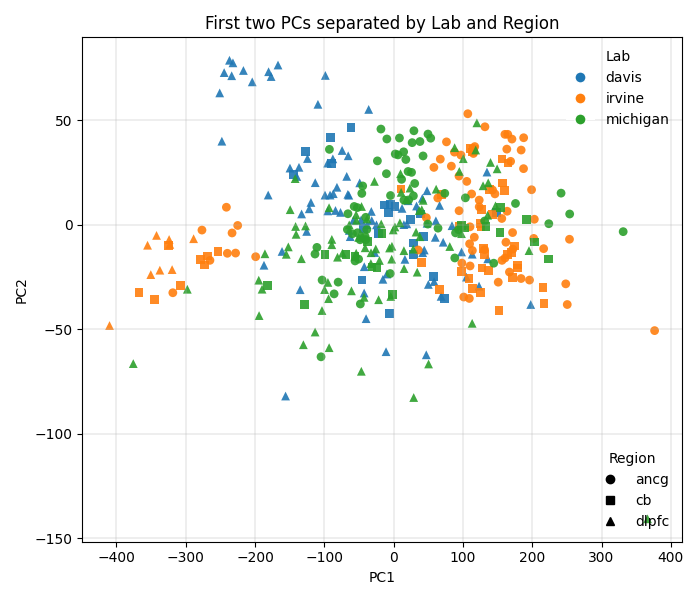

In [127]:
df = final_PC_df.copy()

# infer PC columns
pc_cols = [c for c in df.columns if c.startswith("PC")]
assert {"lab","region"}.issubset(df.columns)
assert {"PC1","PC2"}.issubset(pc_cols), "Need PC1 and PC2 in final_PC_df"

labs = df["lab"].astype("category")
regs = df["region"].astype("category")

# simple color/marker maps
colors = dict(zip(labs.cat.categories, plt.cm.tab10.colors[:len(labs.cat.categories)]))
markers = dict(zip(regs.cat.categories, ['o','s','^','D','P','X','v'][:len(regs.cat.categories)]))

fig, ax = plt.subplots(figsize=(7,6))
for lab_val in labs.cat.categories:
    for reg_val in regs.cat.categories:
        m = (labs == lab_val) & (regs == reg_val)
        if not m.any(): 
            continue
        ax.scatter(df.loc[m, "PC1"], df.loc[m, "PC2"],
                   c=[colors[lab_val]], marker=markers[reg_val],
                   s=40, alpha=0.9, edgecolors='none')

ax.set_xlabel("PC1"); ax.set_ylabel("PC2"); ax.set_title("First two PCs separated by Lab and Region")
ax.grid(True, linewidth=0.3)

# separate legends for lab (colors) and region (markers)
from matplotlib.lines import Line2D
lab_handles = [Line2D([0],[0], marker='o', color='w', label=lab,
                      markerfacecolor=colors[lab], markersize=8) 
               for lab in labs.cat.categories]
reg_handles = [Line2D([0],[0], marker=markers[r], color='k', linestyle='None', label=r) 
               for r in regs.cat.categories]
leg1 = ax.legend(handles=lab_handles, title="Lab", loc="best", frameon=False)
ax.add_artist(leg1)
ax.legend(handles=reg_handles, title="Region", loc="lower right", frameon=False)
plt.tight_layout(); plt.show()


In [128]:
mods = df[["PC1","PC2","lab","region"]].copy()
mods["lab"] = mods["lab"].astype("category")
mods["region"] = mods["region"].astype("category")

In [129]:
for comp in ["PC1","PC2"]:
    m = ols(f"{comp} ~ C(lab) + C(region)", data=mods).fit()
    print(f"\nANOVA for {comp}:")
    print(anova_lm(m, typ=2))


ANOVA for PC1:
                 sum_sq     df          F        PR(>F)
C(lab)     1.616594e+04    2.0   0.470805  6.248621e-01
C(region)  5.380387e+05    2.0  15.669452  2.885769e-07
Residual   6.541159e+06  381.0        NaN           NaN

ANOVA for PC2:
                  sum_sq     df          F    PR(>F)
C(lab)      20727.743920    2.0  13.959438  0.000001
C(region)   19613.606770    2.0  13.209104  0.000003
Residual   282864.912718  381.0        NaN       NaN


### ---------------------------------------- PCs by Lab -------------------------------------------

In [130]:
fig = px.scatter_3d(
    final_PC_df,
    x="PC1", y="PC2", z="PC3",
    color="lab",
    category_orders={"lab": ["davis", "michigan", "irvine"]},
    opacity=0.85,
    title="3-component PCA"
)
fig.update_traces(marker=dict(size=4))
fig.update_layout(scene=dict(xaxis_title="PC1", yaxis_title="PC2", zaxis_title="PC3"))
fig.show()  # drag to rotate


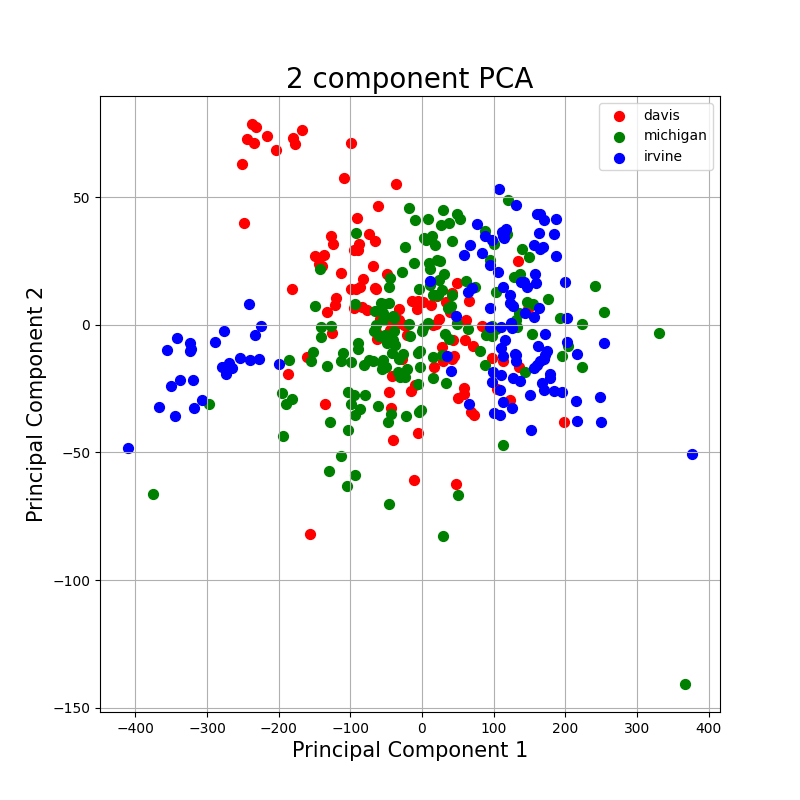

In [143]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['davis', 'michigan', 'irvine']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_PC_df['lab'] == target
    ax.scatter(final_PC_df.loc[indicesToKeep, 'PC1']
               , final_PC_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### --------------------------------------- PCs by Brain Region ----------------------------------------------

In [131]:
brain_region_target = arraymeta_data['region']

In [132]:
PC_df = pd.DataFrame(data = principalComponents)
PC_brain_region_df = pd.concat([PC_df, brain_region_target], axis = 1)
PC_brain_region_df

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,region
0,-241.394620,8.389363,-0.044469,-12.885234,-2.581314,-3.055921,-14.431948,-2.148429,4.896703,7.348052,...,-1.266244,-0.277719,2.544893,0.831457,-0.459610,1.687020,2.746637,1.084731,0.747584,ancg
1,-324.430258,-10.076295,37.329415,-10.567751,10.350082,0.796032,-20.941473,-4.337130,-1.204543,-1.212140,...,2.574768,0.827207,-0.808318,-0.652685,2.310083,0.311161,0.375187,2.016081,-0.371923,cb
2,-31.354534,-20.218450,27.855337,16.860970,5.221065,-2.054197,6.708242,-0.435252,3.779758,1.829315,...,0.465199,2.426772,1.753640,0.146135,1.281135,1.009171,0.278942,1.686265,1.146434,cb
3,-124.381406,31.720574,-2.241897,-0.279448,-21.087420,-3.231646,-8.064244,-1.411616,-11.896375,-4.504296,...,0.935037,0.145181,-0.868179,0.602798,-1.451823,0.367481,1.579427,3.040097,0.720119,dlpfc
4,134.635472,25.228737,-4.712797,-18.630727,-11.384066,-8.069399,6.833284,7.110003,-14.782842,-3.171622,...,2.871639,-0.378978,-3.624723,0.020226,0.583561,-1.572553,6.302515,3.076313,4.169986,dlpfc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,49.243013,0.321841,-21.112378,-1.725965,20.123499,-6.622513,2.019680,-2.926181,-4.474775,6.585415,...,1.858333,-3.612652,0.440550,0.604790,-0.130609,1.963917,-0.784680,-0.976142,1.073066,ancg
382,61.321936,17.044585,-14.799379,-13.042483,21.100090,-7.147367,6.204183,-10.142043,-4.832194,-1.425637,...,2.808219,-2.218807,-1.797395,0.984807,-0.689681,0.913193,-0.211563,0.591258,1.824673,dlpfc
383,97.064292,33.355602,-10.021014,-18.427506,1.782453,1.041464,-5.732291,-0.345489,12.595078,13.237270,...,0.435511,2.977764,-0.496929,-0.234501,-1.398029,0.254099,3.041907,-3.751911,1.597053,ancg
384,64.008859,-1.617070,-18.729140,-11.610589,23.017516,-7.669948,-2.200760,-6.846546,-8.208843,6.451569,...,0.849499,0.726178,0.797144,0.323871,0.983401,-0.499271,-1.602294,-2.769426,1.173611,ancg


In [133]:
# Renaming columns
n = min(50, PC_brain_region_df.shape[1])  # just in case there are < 50 cols
new_names = {old: f"PC{i+1}" for i, old in enumerate(PC_brain_region_df.columns[:n])}
PC_brain_region_df = PC_brain_region_df.rename(columns=new_names)

In [134]:
PC_brain_region_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,region
0,-241.394620,8.389363,-0.044469,-12.885234,-2.581314,-3.055921,-14.431948,-2.148429,4.896703,7.348052,...,-1.266244,-0.277719,2.544893,0.831457,-0.459610,1.687020,2.746637,1.084731,0.747584,ancg
1,-324.430258,-10.076295,37.329415,-10.567751,10.350082,0.796032,-20.941473,-4.337130,-1.204543,-1.212140,...,2.574768,0.827207,-0.808318,-0.652685,2.310083,0.311161,0.375187,2.016081,-0.371923,cb
2,-31.354534,-20.218450,27.855337,16.860970,5.221065,-2.054197,6.708242,-0.435252,3.779758,1.829315,...,0.465199,2.426772,1.753640,0.146135,1.281135,1.009171,0.278942,1.686265,1.146434,cb
3,-124.381406,31.720574,-2.241897,-0.279448,-21.087420,-3.231646,-8.064244,-1.411616,-11.896375,-4.504296,...,0.935037,0.145181,-0.868179,0.602798,-1.451823,0.367481,1.579427,3.040097,0.720119,dlpfc
4,134.635472,25.228737,-4.712797,-18.630727,-11.384066,-8.069399,6.833284,7.110003,-14.782842,-3.171622,...,2.871639,-0.378978,-3.624723,0.020226,0.583561,-1.572553,6.302515,3.076313,4.169986,dlpfc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,49.243013,0.321841,-21.112378,-1.725965,20.123499,-6.622513,2.019680,-2.926181,-4.474775,6.585415,...,1.858333,-3.612652,0.440550,0.604790,-0.130609,1.963917,-0.784680,-0.976142,1.073066,ancg
382,61.321936,17.044585,-14.799379,-13.042483,21.100090,-7.147367,6.204183,-10.142043,-4.832194,-1.425637,...,2.808219,-2.218807,-1.797395,0.984807,-0.689681,0.913193,-0.211563,0.591258,1.824673,dlpfc
383,97.064292,33.355602,-10.021014,-18.427506,1.782453,1.041464,-5.732291,-0.345489,12.595078,13.237270,...,0.435511,2.977764,-0.496929,-0.234501,-1.398029,0.254099,3.041907,-3.751911,1.597053,ancg
384,64.008859,-1.617070,-18.729140,-11.610589,23.017516,-7.669948,-2.200760,-6.846546,-8.208843,6.451569,...,0.849499,0.726178,0.797144,0.323871,0.983401,-0.499271,-1.602294,-2.769426,1.173611,ancg


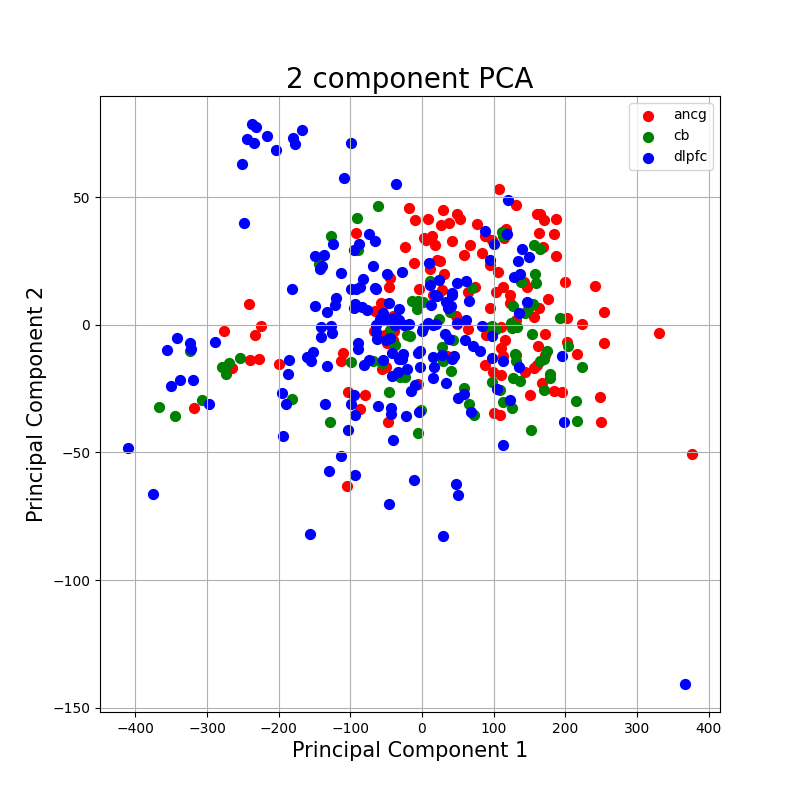

In [141]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['ancg', 'cb', 'dlpfc']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = PC_brain_region_df['region'] == target
    ax.scatter(PC_brain_region_df.loc[indicesToKeep, 'PC1']
               , PC_brain_region_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [135]:
fig = px.scatter_3d(
    PC_brain_region_df,
    x="PC1", y="PC2", z="PC3",
    color="region",
    category_orders={"region": ["ancg", "cb", "dlpfc"]},
    opacity=0.85,
    title="Plot of first three Principal Components by Brain Region"
)
fig.update_traces(marker=dict(size=4))
fig.update_layout(scene=dict(xaxis_title="PC1", yaxis_title="PC2", zaxis_title="PC3"))
fig.show()  # drag to rotate



In [136]:
regions = ["ancg", "cb", "dlpfc"]
colors  = {"ancg":"red", "cb":"green", "dlpfc":"blue"}

fig = make_subplots(
    rows=1, cols=3,
    specs=[[{"type":"scene"}]*3],
    subplot_titles=regions
)

for i, reg in enumerate(regions, start=1):
    df = PC_brain_region_df[PC_brain_region_df["region"] == reg]
    fig.add_trace(
        go.Scatter3d(
            x=df["PC1"], y=df["PC2"], z=df["PC3"],
            mode="markers",
            marker=dict(size=3),
            name=reg,
            showlegend=False
        ),
        row=1, col=i
    )

fig.update_scenes(
    xaxis_title="PC1", yaxis_title="PC2", zaxis_title="PC3",
    aspectmode="cube"
)
fig.update_layout(title="Separate PCs by Brain Region", margin=dict(l=0, r=0, b=0, t=40))
fig.show()  # drag to rotate each subplot